### 线性回归的简洁实现
例子：用线性回归模型拟合带有服从-0.5 到 0.5 的均匀分布噪声的正弦函数

In [61]:
import numpy as np
from matplotlib import pyplot as plt
import torch
from torch.utils import data
from torch import nn

生成数据集: 正弦函数+随机噪声

In [62]:
num_observations = 100
x = np.linspace(-3, 3, num_observations)
y = np.sin(x) + np.random.uniform(-0.5, 0.5, num_observations)

构建数据迭代器

In [63]:
def load_array(data_arrays, batch_size, is_train=True):
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)

简单处理原始数据, 初始化数据迭代器

In [64]:
batch_size = 10
features = torch.from_numpy(x).type(torch.float32).reshape(-1, 1)
labels = torch.from_numpy(y).type(torch.float32).reshape(-1, 1)

data_iter = load_array((features, labels), batch_size)

In [65]:
next(iter(data_iter))

[tensor([[-2.5152],
         [ 2.3939],
         [ 1.2424],
         [-0.5152],
         [ 1.6667],
         [ 2.5758],
         [-0.3939],
         [ 1.8485],
         [ 0.6364],
         [ 0.0909]]),
 tensor([[-0.6717],
         [ 0.3632],
         [ 1.0844],
         [-0.1079],
         [ 1.2082],
         [ 0.1642],
         [-0.1016],
         [ 0.6608],
         [ 0.5274],
         [-0.3599]])]

定义模型  
用框架中提前准备好的构件很方便

In [66]:
net = nn.Sequential(nn.Linear(1,1))

初始化模型参数

In [67]:
net[0].weight.data.normal_(0, 0.01)
net[0].bias.data.fill_(0)

tensor([0.])

定义损失函数

In [68]:
loss = nn.MSELoss()

定义优化方法

In [69]:
trainer = torch.optim.SGD(net.parameters(), lr = 0.005)

开始训练

In [70]:
num_epochs = 100
for epoch in range(num_epochs):
    for X, y in data_iter:
        l = loss(net(X), y)
        trainer.zero_grad()
        l.backward()
        trainer.step()
    l = loss(net(features), labels)
    print(f'epoch {epoch + 1}, loss {l:f}, w {net[0].weight.data[0, 0]}, b {net[0].bias.data[0]}')

epoch 1, loss 0.410211, w 0.07609143853187561, b 0.0010609857272356749
epoch 2, loss 0.328852, w 0.140553817152977, b 0.001841965364292264
epoch 3, loss 0.286138, w 0.18682065606117249, b 0.002513329265639186
epoch 4, loss 0.262737, w 0.22145015001296997, b 0.0033595107961446047
epoch 5, loss 0.250664, w 0.2458275705575943, b 0.0042422497645020485
epoch 6, loss 0.244081, w 0.2638428807258606, b 0.004862793255597353
epoch 7, loss 0.240476, w 0.27722442150115967, b 0.005570407956838608
epoch 8, loss 0.238532, w 0.28701457381248474, b 0.006219091825187206
epoch 9, loss 0.237396, w 0.2948859930038452, b 0.0066131604835391045
epoch 10, loss 0.236933, w 0.2992115914821625, b 0.006881783716380596
epoch 11, loss 0.236681, w 0.30217546224594116, b 0.007162690628319979
epoch 12, loss 0.236518, w 0.3045808970928192, b 0.007145575247704983
epoch 13, loss 0.236439, w 0.3059733808040619, b 0.0073704225942492485
epoch 14, loss 0.236327, w 0.30846351385116577, b 0.0075760879553854465
epoch 15, loss 0.

展示训练结果

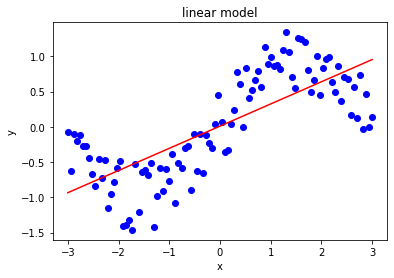

In [71]:
_y = net(features)
plt.title("linear model")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(features.numpy(), labels.numpy(), 'ob')
plt.plot(features.numpy(), _y.detach().numpy(), 'r')
plt.show()